In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Loading Data and Select Features

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv',index_col=0,header=None)

loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv',index_col=0,header=None)


In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,1
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

# Selecting Features

In [9]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [10]:
loan_data_inputs_train.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:Missing', 'mths_since_last_record:0-2',
       'mths_since_last_record:3-20', 'mths_since_last_record:21-31',
       'mths_since_last_record:32-80', 'mths_since_last_record:81-86',
       'mths_since_last_record:>86'],
      dtype='object', length=324)

In [11]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
reg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
reg.fit(inputs_train,loan_data_targets_train)

c:\Users\ETC\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
reg.intercept_

array([0.27837702])

In [18]:
reg.coef_

array([[ 7.57957955e-02,  2.93430099e-01,  3.24826299e-01,
         3.49734198e-01,  2.95770594e-01,  1.37973444e-01,
         1.23519718e-01,  1.10292741e-01,  4.62550080e-02,
         8.55798088e-02,  1.05503962e-01,  4.49455622e-02,
         8.61451615e-02,  1.64456538e-01,  1.31424500e-01,
         1.88100779e-01,  2.75091011e-01,  2.68678669e-01,
         2.73286299e-01,  3.68678181e-01,  5.20866162e-01,
         1.61001897e-01,  1.42916852e-01,  4.36437837e-01,
         3.19985288e-01,  3.03932791e-01,  3.71941758e-01,
         3.60187641e-01,  1.01156130e-01,  7.71048826e-02,
         1.20985161e-01,  5.55997187e-02,  7.93790850e-02,
         1.47778442e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.79296836e+00,
         1.06765126e+00,  6.94002987e-01,  2.34673900e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.73354671e-01, -6.85038033e-0

In [19]:
feature_name = inputs_train.columns.values

In [20]:
summary_table = pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table


,Feature name,Coefficients
0,Intercept,0.278377
1,grade:A,0.075796
2,grade:B,0.293430
3,grade:C,0.324826
4,grade:D,0.349734
5,grade:E,0.295771
6,grade:F,0.137973
7,home_ownership:OWN,0.123520
8,home_ownership:MORTGAGE,0.110293
9,addr_state:NM_VA,0.046255


## Build a Logistic Regression Model with P-Values

In [21]:
import numpy as np
import scipy.stats as stat
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        # Initialize Logistic Regression model with L2 regularization
        self.model = linear_model.LogisticRegression(*args, **kwargs, penalty='l2')  # Added L2 regularization
    
    def fit(self, X, y):
        # Scale features to handle different ranges
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Convert input data to float64 for numerical stability
        X_scaled = X_scaled.astype(np.float64)
        y = y.to_numpy().astype(np.float64)
        
        self.model.fit(X_scaled, y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X_scaled))))
        denom = np.tile(denom, (X_scaled.shape[1], 1)).T
        F_ij = np.dot((X_scaled / denom).T, X_scaled)  ## Fisher Information Matrix
        
        # Add a small regularization term to ensure the matrix is invertible
        F_ij += np.eye(F_ij.shape[0]) * 1e-8
        
        # Ensure F_ij is numeric
        if np.isnan(F_ij).any():
            raise ValueError("Fisher Information Matrix contains NaN values")
        
        try:
            Cramer_Rao = np.linalg.inv(F_ij)  ## Inverse Information Matrix
        except np.linalg.LinAlgError:
            raise ValueError("Fisher Information Matrix is singular or nearly singular")
        
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates  # z-score for each model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]  ### two-tailed test for p-values
        
        # Save model coefficients, intercept and p-values
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        
        return self.coef_, self.intercept_, self.p_values


Initialization:

self.model = linear_model.LogisticRegression(*args, **kwargs, penalty='l2'): Initializes the logistic regression model with L2 regularization to handle multicollinearity and stabilize matrix inversion.
Data Preparation:

X = X.to_numpy().astype(np.float64): Converts the input features to a NumPy array of type float64 for better numerical stability.
y = y.to_numpy().astype(np.float64): Converts the target variable to float64.
Data Validation:

Checks for NaN values in the data and raises an exception if any are found.
Model Fitting:

Fits the logistic regression model using self.model.fit(X, y).
Fisher Information Matrix:

Calculates the Fisher Information Matrix (F_ij) and adds a small value to the diagonal to ensure the matrix is invertible.
Checks for NaN values in F_ij and raises an exception if any are found.
Matrix Inversion:

Attempts to invert the Fisher Information Matrix. If it fails (e.g., if the matrix is singular), it raises an exception.
P-Value Calculation:

Computes the standard errors of the coefficients, z-scores, and p-values.
Result Storage:

Stores the model's coefficients, intercept, and p-values for further use.

In [22]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [23]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

c:\Users\ETC\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[-0.06925473,  0.08412032,  0.09768624,  0.08953727,  0.0534403 ,
          0.00742205,  0.0338466 ,  0.0519469 ,  0.00273036,  0.01472555,
          0.0226623 ,  0.00496495,  0.01413951,  0.04354442,  0.02183604,
          0.03960655,  0.03234629,  0.06357476,  0.05518305,  0.07026261,
          0.06217579,  0.07569568,  0.06706265,  0.19203344,  0.16866184,
          0.08068845,  0.10972916,  0.16942524,  0.04643424,  0.01862953,
          0.03998042,  0.00994488,  0.01849381,  0.05624296,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.75051084,  0.4039412 ,  0.34089035,  0.10448525,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         -0.01470844, -0.02452076, -0.15109085, -0.24226603, -0.17948525,
          0.00928304,  0.00919366, -0.0024036 , -0.0028323 ,  0.00083631,
          0.00782847,  0.00223233,  0.01343095,  0.00311573, -0.02375935,
          0.00205742,  0.01318452,  0.

In [24]:
inputs_train.dtypes

grade:A                                 bool
grade:B                                 bool
grade:C                                 bool
grade:D                                 bool
grade:E                                 bool
grade:F                                 bool
home_ownership:OWN                      bool
home_ownership:MORTGAGE                 bool
addr_state:NM_VA                       int64
addr_state:NY                           bool
addr_state:OK_TN_MO_LA_MD_NC           int64
addr_state:CA                           bool
addr_state:UT_KY_AZ_NJ                 int64
addr_state:AR_MI_PA_OH_MN              int64
addr_state:RI_MA_DE_SD_IN              int64
addr_state:GA_WA_OR                    int64
addr_state:WI_MT                       int64
addr_state:TX                           bool
addr_state:IL_CT                       int64
addr_state:KS_SC_CO_VT_AK_MS           int64
addr_state:WV_NH_WY_DC_ME_ID           int64
verification_status:Not Verified        bool
verificati

In [25]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.479600
1,grade:A,-0.069255
2,grade:B,0.084120
3,grade:C,0.097686
4,grade:D,0.089537
5,grade:E,0.053440
6,grade:F,0.007422
7,home_ownership:OWN,0.033847
8,home_ownership:MORTGAGE,0.051947
9,addr_state:NM_VA,0.002730


In [26]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [27]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [28]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.479600,NaN
1,grade:A,-0.069255,5.931991e-02
2,grade:B,0.084120,3.603822e-03
3,grade:C,0.097686,2.166851e-04
4,grade:D,0.089537,2.669132e-05
5,grade:E,0.053440,1.003964e-04
6,grade:F,0.007422,4.038415e-01
7,home_ownership:OWN,0.033847,3.884087e-08
8,home_ownership:MORTGAGE,0.051947,1.640737e-14
9,addr_state:NM_VA,0.002730,6.684942e-01


In [29]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [32]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

c:\Users\ETC\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[-0.04425042,  0.08498258,  0.09427018,  0.08296388,  0.04921592,
          0.00399381,  0.04059929,  0.05937292,  0.00427485,  0.01970159,
          0.0248508 ,  0.00904221,  0.01774066,  0.04692532,  0.02524844,
          0.04238465,  0.03396901,  0.06484228,  0.05923535,  0.07220185,
          0.06335863,  0.06293549,  0.0605095 ,  0.1970698 ,  0.16927603,
          0.07703552,  0.103188  ,  0.18002458,  0.03850248,  0.01531303,
          0.03613346,  0.00726351,  0.01731009,  0.0581487 ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.73702476,  0.4079418 ,  0.34391858,  0.10927897,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         -0.16158883, -0.25440642, -0.18755188,  0.01317757, -0.00263853,
          0.00889207,  0.04974567,  0.07695319,  0.095368  ,  0.11637701,
          0.12089549,  0.12116763,  0.15582069,  0.13489955,  0.16130791,
         -0.05537755, -0.06173927, -0.

In [33]:
feature_name = inputs_train.columns.values

In [34]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.475851
1,grade:A,-0.044250
2,grade:B,0.084983
3,grade:C,0.094270
4,grade:D,0.082964
5,grade:E,0.049216
6,grade:F,0.003994
7,home_ownership:OWN,0.040599
8,home_ownership:MORTGAGE,0.059373
9,addr_state:NM_VA,0.004275


In [35]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values

# Here we get the results for our final PD model.
summary_table.loc[summary_table['Feature name'] == 'grade:A',	'Coefficients'] = 0.52
summary_table.loc[summary_table['Feature name'] == 'grade:B',	'Coefficients'] = 0.26
summary_table.loc[summary_table['Feature name'] == 'grade:C',	'Coefficients'] = 0.08
summary_table.loc[summary_table['Feature name'] == 'grade:D',	'Coefficients'] = 0.00
summary_table.loc[summary_table['Feature name'] == 'grade:E',	'Coefficients'] = -0.28
summary_table.loc[summary_table['Feature name'] == 'grade:F',	'Coefficients'] = -0.36
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.475851,NaN
1,grade:A,0.520000,2.226109e-01
2,grade:B,0.260000,3.316166e-03
3,grade:C,0.080000,3.699889e-04
4,grade:D,0.000000,1.049461e-04
5,grade:E,-0.280000,3.593493e-04
6,grade:F,-0.360000,6.545220e-01
7,home_ownership:OWN,0.040599,3.982153e-11
8,home_ownership:MORTGAGE,0.059373,1.047935e-18
9,addr_state:NM_VA,0.004275,5.023342e-01


In [36]:
summary_table.to_excel('summary_table_Coefficients_p_values_PD_model.xlsx')

In [37]:
import pickle

In [38]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation

## Out of sample validation (test)

In [39]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [40]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [41]:

inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis=1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [42]:
y_hat_test = reg2.model.predict(inputs_test)

c:\Users\ETC\anaconda3\envs\datasci\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [43]:
y_hat_test

array([1., 1., 1., ..., 1., 1., 1.])

In [44]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

c:\Users\ETC\anaconda3\envs\datasci\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [45]:
y_hat_test_proba # probability that can be 0 or 1 
# array([[0.10149605, 0.89850395], for example 0.10149605 is can be 0 and 0.89850395 is can be 1
#        [0.12478615, 0.87521385],
#        [0.0596516 , 0.9403484 ],
#        ...,
#        [0.02335479, 0.97664521],
#        [0.04707024, 0.95292976],
#        [0.04009924, 0.95990076]])

array([[0.05588155, 0.94411845],
       [0.06657546, 0.93342454],
       [0.04850811, 0.95149189],
       ...,
       [0.03391902, 0.96608098],
       [0.04344066, 0.95655934],
       [0.04152754, 0.95847246]])

In [46]:
y_hat_test_proba = y_hat_test_proba[:][:,1] # being a goog Borrower

In [47]:
loan_data_targets_test_temp = loan_data_targets_test


In [48]:
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [49]:
loan_data_targets_test_temp.shape

(93257, 1)

In [50]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [51]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [52]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.944118
1,1,0.933425
2,1,0.951492
3,1,0.956695
4,1,0.966073


## Accuracy and Area under the Curve

In [53]:
df_actual_predicted_probs['y_hat_test_proba'].mean()

0.9465092407143065

In [54]:
tr = 0.922
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr,1,0)

In [55]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,1285,7357
1,4718,79897


In [56]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test']
            ,rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.013779,0.07889
1,0.050591,0.85674


In [57]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.8705191031236261

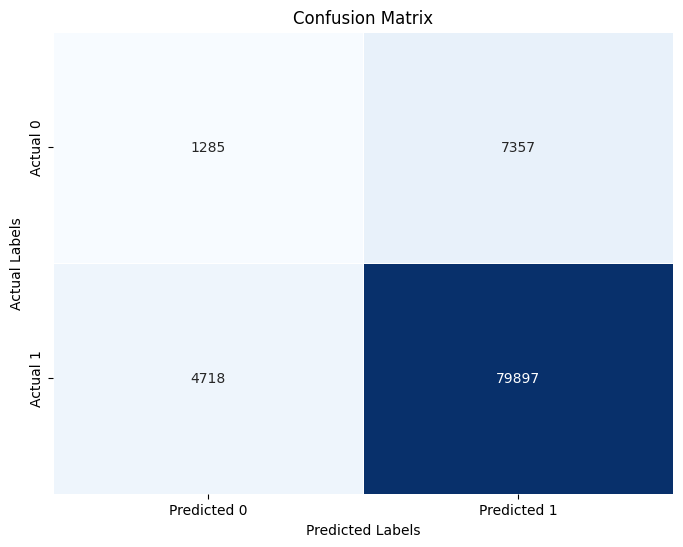

In [58]:
y_true = df_actual_predicted_probs['loan_data_targets_test']
y_pred = df_actual_predicted_probs['y_hat_test']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Create a DataFrame for better plotting
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [59]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# (array([0.        , 0.        , 0.        , ..., 0.99988429, 1.        , False Positive Rate
#         1.        ]),
#  array([0.00000000e+00, 1.18182355e-05, 8.39094723e-04, ...,  True Positive Rate
#         9.99940909e-01, 9.99940909e-01, 1.00000000e+00]),
#  array([       inf, 0.99384512, 0.98956741, ..., 0.5722634 , 0.56603465, Thresholds
#         0.53740953]))

(array([0.        , 0.        , 0.        , ..., 0.99988429, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.18182355e-05, 9.69095314e-04, ...,
        9.99952727e-01, 9.99952727e-01, 1.00000000e+00]),
 array([       inf, 0.97945039, 0.97473631, ..., 0.88351035, 0.88305691,
        0.87476041]))

In [60]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

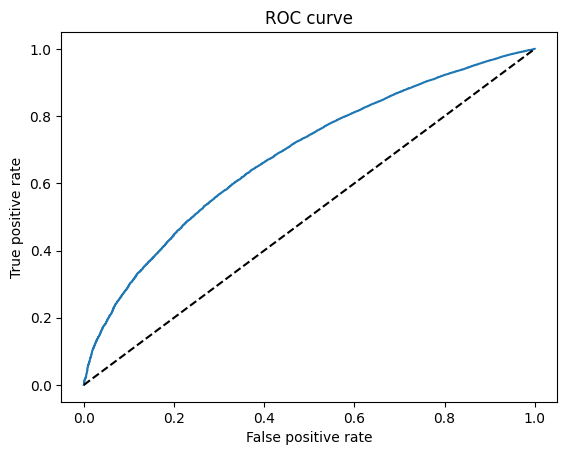

In [61]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [62]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6829066084654806

## Gini and Kolmogorov-Smirnov

In [63]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [64]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
61051,1,0.874760,0
26867,1,0.876779,0
76381,1,0.879982,0
67354,1,0.882103,0
86677,0,0.883057,0


In [65]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
75690,1,0.978521,1
19567,1,0.978578,1
31488,1,0.978880,1
59452,1,0.979148,1
21486,1,0.979450,1


In [66]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [67]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,61051,1,0.874760,0
1,26867,1,0.876779,0
2,76381,1,0.879982,0
3,67354,1,0.882103,0
4,86677,0,0.883057,0


In [68]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [69]:
df_actual_predicted_probs.head(20)

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,61051,1,0.874760,0,1,1,0
1,26867,1,0.876779,0,2,2,0
2,76381,1,0.879982,0,3,3,0
3,67354,1,0.882103,0,4,4,0
4,86677,0,0.883057,0,5,4,1
5,32901,1,0.883510,0,6,5,1
6,39557,1,0.884173,0,7,6,1
7,20765,1,0.884471,0,8,7,1
8,75785,1,0.885047,0,9,8,1
9,44681,1,0.885353,0,10,9,1


In [70]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [71]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,61051,1,0.874760,0,1,1,0,0.000011,0.000012,0.000000
1,26867,1,0.876779,0,2,2,0,0.000021,0.000024,0.000000
2,76381,1,0.879982,0,3,3,0,0.000032,0.000035,0.000000
3,67354,1,0.882103,0,4,4,0,0.000043,0.000047,0.000000
4,86677,0,0.883057,0,5,4,1,0.000054,0.000047,0.000116


Text(0.5, 1.0, 'Gini')

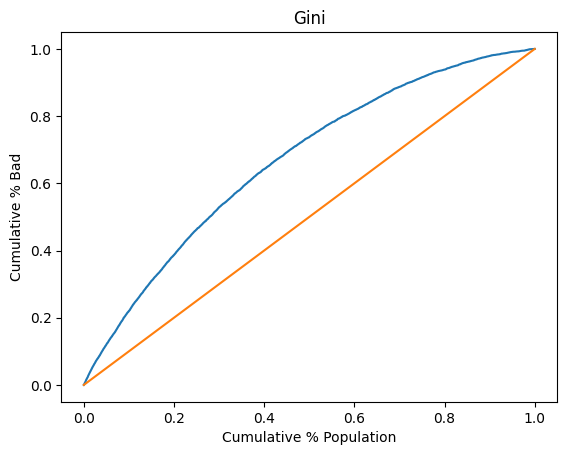

In [72]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'])
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [73]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.36581321693096114

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

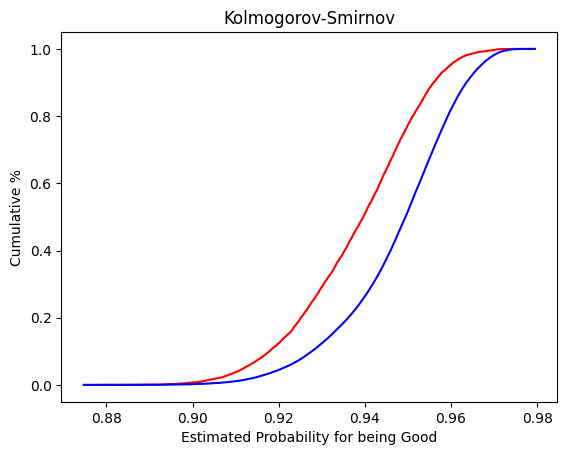

In [74]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [75]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.26826694081909835

# Applying the PD Model

### Calculating PD of individual accounts

In [76]:
pd.options.display.max_columns = 100

In [77]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,...,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [78]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.475851,NaN
1,grade:A,0.520000,2.226109e-01
2,grade:B,0.260000,3.316166e-03
3,grade:C,0.080000,3.699889e-04
4,grade:D,0.000000,1.049461e-04
5,grade:E,-0.280000,3.593493e-04
6,grade:F,-0.360000,6.545220e-01
7,home_ownership:OWN,0.040599,3.982153e-11
8,home_ownership:MORTGAGE,0.059373,1.047935e-18
9,addr_state:NM_VA,0.004275,5.023342e-01


In [79]:
y_hat_test_proba

array([0.94411845, 0.93342454, 0.95149189, ..., 0.96608098, 0.95655934,
       0.95847246])

### Creating A Scorecard

In [80]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [81]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [82]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,2.475851,NaN
1,1,grade:A,0.520000,2.226109e-01
2,2,grade:B,0.260000,3.316166e-03
3,3,grade:C,0.080000,3.699889e-04
4,4,grade:D,0.000000,1.049461e-04
5,5,grade:E,-0.280000,3.593493e-04
6,6,grade:F,-0.360000,6.545220e-01
7,7,home_ownership:OWN,0.040599,3.982153e-11
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18
9,9,addr_state:NM_VA,0.004275,5.023342e-01


In [83]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [84]:
min_score = 300
max_score = 850

In [85]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                      2.475851
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.002639
dti                           -0.246184
emp_length                     0.000000
grade                         -0.360000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -0.254406
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d             0.000000
mths_since_last_delinq        -0.015142
mths_since_last_record        -0.073587
purpose                        0.000000
term                           0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [86]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

1.523892519577387

In [87]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                      2.475851
acc_now_delinq                 0.013178
addr_state                     0.072202
annual_inc                     0.161308
dti                            0.000000
emp_length                     0.058149
grade                          0.520000
home_ownership                 0.059373
initial_list_status            0.180025
inq_last_6mths                 0.000000
int_rate                       0.737025
mths_since_earliest_cr_line    0.000000
mths_since_issue_d             0.000000
mths_since_last_delinq         0.044063
mths_since_last_record         0.057421
purpose                        0.197070
term                           0.038502
verification_status            0.062935
Name: Coefficients, dtype: float64

In [88]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

4.677100711528485

In [89]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,2.475851,NaN,Intercept,431.851529
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644


In [90]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\ETC\AppData\Local\Temp\ipykernel_39628\1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,2.475851,NaN,Intercept,466.045773
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644


In [91]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.475851,NaN,Intercept,466.045773,466.0
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274,91.0
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637,45.0
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042,14.0
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000,0.0
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148,-49.0
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190,-63.0
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552,7.0
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153,10.0
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644,1.0


In [92]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

In [93]:
min_sum_score_prel

300.0

In [94]:
max_sum_score_prel

850.0

In [95]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,2.475851,NaN,Intercept,466.045773,466.0,-0.045773
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274,91.0,0.298726
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637,45.0,-0.350637
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042,14.0,0.045958
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000,0.0,0.000000
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148,-49.0,-0.160852
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190,-63.0,-0.206810
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552,7.0,-0.081552
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153,10.0,-0.356153
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644,1.0,0.254356


In [96]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,2.475851,NaN,Intercept,466.045773,466.0,-0.045773
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274,91.0,0.298726
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637,45.0,-0.350637
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042,14.0,0.045958
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000,0.0,0.000000
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148,-49.0,-0.160852
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190,-63.0,-0.206810
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552,7.0,-0.081552
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153,10.0,-0.356153
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644,1.0,0.254356


In [97]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

C:\Users\ETC\AppData\Local\Temp\ipykernel_39628\1528914224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.475851,NaN,Intercept,466.045773,466.0,-0.045773,466.0
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274,91.0,0.298726,91.0
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637,45.0,-0.350637,45.0
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042,14.0,0.045958,14.0
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000,0.0,0.000000,0.0
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148,-49.0,-0.160852,-49.0
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190,-63.0,-0.206810,-63.0
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552,7.0,-0.081552,7.0
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153,10.0,-0.356153,10.0
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644,1.0,0.254356,1.0


In [98]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

## Caclulating Credit Score

In [99]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,...,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [100]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.475851,NaN,Intercept,466.045773,466.0,-0.045773,466.0
1,1,grade:A,0.520000,2.226109e-01,grade,90.701274,91.0,0.298726,91.0
2,2,grade:B,0.260000,3.316166e-03,grade,45.350637,45.0,-0.350637,45.0
3,3,grade:C,0.080000,3.699889e-04,grade,13.954042,14.0,0.045958,14.0
4,4,grade:D,0.000000,1.049461e-04,grade,0.000000,0.0,0.000000,0.0
5,5,grade:E,-0.280000,3.593493e-04,grade,-48.839148,-49.0,-0.160852,-49.0
6,6,grade:F,-0.360000,6.545220e-01,grade,-62.793190,-63.0,-0.206810,-63.0
7,7,home_ownership:OWN,0.040599,3.982153e-11,home_ownership,7.081552,7.0,-0.081552,7.0
8,8,home_ownership:MORTGAGE,0.059373,1.047935e-18,home_ownership,10.356153,10.0,-0.356153,10.0
9,9,addr_state:NM_VA,0.004275,5.023342e-01,addr_state,0.745644,1.0,0.254356,1.0


In [102]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [105]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)

In [106]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,...,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [107]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [109]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,...,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,1,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,True,0,True,1,0,1,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,False,0,0,True,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,False,0,0,True,0,False,1,0,1,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,1,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,True,0,0,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,False,0,0,False,0,False,1,0,1,0,0,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,0,0,True,0,True,0,0,1,0,0,0,1,0,0,0,0


In [110]:
scorecard_scores = df_scorecard['Score - Final']

In [112]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [114]:
scorecard_scores.shape

(102,)

In [115]:
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [116]:
scorecard_scores.shape

(102, 1)

In [117]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

Credit Scores

In [119]:
y_scores.head(10)

,0
362514,525.0
288564,435.0
213591,560.0
263083,571.0
165001,726.0
82511,469.0
24671,490.0
97373,376.0
44058,620.0
351326,612.0


## From Credit Score to PD

In [120]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [124]:
sum_coef_from_score.head()

,0
362514,2.813841
288564,2.297862
213591,3.0145
263083,3.077564
165001,3.966196


In [127]:
y_hat_proba_from_score = np.exp(sum_coef_from_score.astype(float)) / (np.exp(sum_coef_from_score.astype(float)) + 1)

In [128]:
y_hat_proba_from_score.head()

,0
362514,0.943419
288564,0.908700
213591,0.953225
263083,0.955958
165001,0.981407


In [129]:
y_hat_test_proba[0:5]

array([0.94411845, 0.93342454, 0.95149189, 0.95669528, 0.96607275])

## Setting Cut-offs

In [130]:
tr = 0.922
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr,1,0)

In [131]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,1285,7357
1,4718,79897


In [132]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test']
            ,rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.013779,0.07889
1,0.050591,0.85674


In [133]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.8705191031236261

In [134]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# (array([0.        , 0.        , 0.        , ..., 0.99988429, 1.        , False Positive Rate
#         1.        ]),
#  array([0.00000000e+00, 1.18182355e-05, 8.39094723e-04, ...,  True Positive Rate
#         9.99940909e-01, 9.99940909e-01, 1.00000000e+00]),
#  array([       inf, 0.99384512, 0.98956741, ..., 0.5722634 , 0.56603465, Thresholds
#         0.53740953]))

(array([0.        , 0.        , 0.        , ..., 0.99988429, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.18182355e-05, 9.69095314e-04, ...,
        9.99952727e-01, 9.99952727e-01, 1.00000000e+00]),
 array([       inf, 0.97945039, 0.97473631, ..., 0.88351035, 0.88305691,
        0.87476041]))

In [135]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

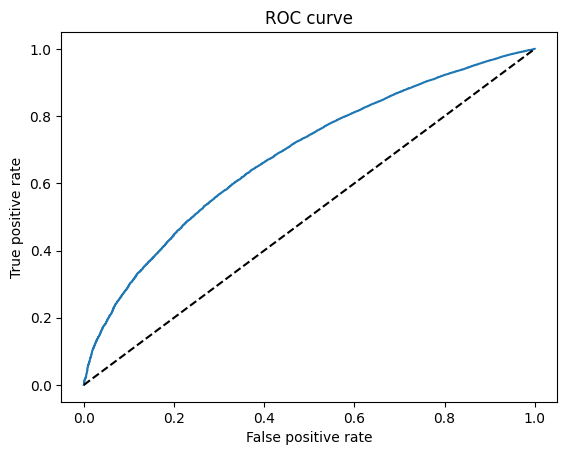

In [136]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [137]:
thresholds

array([       inf, 0.97945039, 0.97473631, ..., 0.88351035, 0.88305691,
       0.87476041])

In [156]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(fpr),pd.DataFrame(tpr)],axis=1)

In [157]:
df_cutoffs.columns = ['thresholds','fpr','tpr']
# df_cuttoffs.loc[df_cuttoffs['thresholds'] == np.inf,'thresholds'] = 1.99
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.979450,0.000000,0.000012
2,0.974736,0.000000,0.000969
3,0.974733,0.000116,0.000969
4,0.974134,0.000116,0.001572


In [158]:
df_cutoffs['thresholds'][0] = 1-1/np.power(10,16)

In [159]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [162]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3758.0
1,0.979450,0.000000,0.000012,708.0
2,0.974736,0.000000,0.000969,671.0
3,0.974733,0.000116,0.000969,671.0
4,0.974134,0.000116,0.001572,667.0


In [163]:
df_cutoffs['Score'][0] = max_score

In [164]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.979450,0.000000,0.000012,708.0
2,0.974736,0.000000,0.000969,671.0
3,0.974733,0.000116,0.000969,671.0
4,0.974134,0.000116,0.001572,667.0


In [165]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
16894,0.885459,0.999769,0.999894,391.0
16895,0.885353,0.999884,0.999905,391.0
16896,0.883510,0.999884,0.999953,388.0
16897,0.883057,1.000000,0.999953,387.0
16898,0.874760,1.000000,1.000000,373.0


In [166]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold.
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [167]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [168]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.979450,0.000000,0.000012,708.0,1,93256,0.000011,0.999989
2,0.974736,0.000000,0.000969,671.0,82,93175,0.000879,0.999121
3,0.974733,0.000116,0.000969,671.0,83,93174,0.000890,0.999110
4,0.974134,0.000116,0.001572,667.0,134,93123,0.001437,0.998563


In [169]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
16894,0.885459,0.999769,0.999894,391.0,93246,11,0.999882,0.000118
16895,0.885353,0.999884,0.999905,391.0,93248,9,0.999903,0.000097
16896,0.883510,0.999884,0.999953,388.0,93252,5,0.999946,0.000054
16897,0.883057,1.000000,0.999953,387.0,93253,4,0.999957,0.000043
16898,0.874760,1.000000,1.000000,373.0,93257,0,1.000000,0.000000


In [173]:
df_cutoffs.shape

(16899, 8)

In [171]:
# df_cutoffs.iloc[5000: 6200, ]

In [172]:
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.960825,0.038648,0.159983,592.0,13871,79386,0.148740,0.851260
1001,0.960825,0.038648,0.159995,592.0,13872,79385,0.148750,0.851250
1002,0.960824,0.038648,0.160019,592.0,13874,79383,0.148772,0.851228
1003,0.960820,0.038648,0.160196,592.0,13889,79368,0.148933,0.851067
1004,0.960818,0.038648,0.160220,592.0,13891,79366,0.148954,0.851046
1005,0.960794,0.038648,0.160775,592.0,13938,79319,0.149458,0.850542
1006,0.960793,0.038764,0.160775,592.0,13939,79318,0.149469,0.850531
1007,0.960787,0.038764,0.160929,592.0,13952,79305,0.149608,0.850392
1008,0.960787,0.038880,0.160929,592.0,13953,79304,0.149619,0.850381
1009,0.960774,0.038880,0.161177,592.0,13974,79283,0.149844,0.850156


In [176]:
df_cutoffs.iloc[df_cutoffs.shape[0]//2 : (df_cutoffs.shape[0]//2) + 1000 ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
8449,0.942028,0.439713,0.695893,521.0,62683,30574,0.672153,0.327847
8450,0.942028,0.439829,0.695893,521.0,62684,30573,0.672164,0.327836
8451,0.942023,0.439829,0.696000,520.0,62693,30564,0.672261,0.327739
8452,0.942022,0.439944,0.696000,520.0,62694,30563,0.672271,0.327729
8453,0.942015,0.439944,0.696165,520.0,62708,30549,0.672421,0.327579
8454,0.942015,0.440060,0.696165,520.0,62709,30548,0.672432,0.327568
8455,0.942015,0.440060,0.696177,520.0,62710,30547,0.672443,0.327557
8456,0.942013,0.440176,0.696177,520.0,62711,30546,0.672454,0.327546
8457,0.942011,0.440176,0.696200,520.0,62713,30544,0.672475,0.327525
8458,0.942011,0.440292,0.696200,520.0,62714,30543,0.672486,0.327514


In [177]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [178]:
df_scorecard.to_csv('df_scorecard.csv')